#### Using Train1 Data
・Feature selection by GA      

#### Using Train2 Data
・Check discrimination power of features by drawing box-plot and calculating EMD.   
・Based on the above results, three features are selected and Kernel Density Estimation is executed.

#### Using Test Data
・Validation of built model      

#### 2019/3/20 Shinji Komine

## Interaction terms only

In [1]:
%matplotlib inline

import sys
# sys.path.append('C:\\Users\\komine\\Anaconda3\\envs\\tf\Lib\\site-packages')

import warnings
warnings.filterwarnings('ignore')
import os
import gc
import sys
import glob
import time
import tqdm
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV


Number of Feature Values

In [2]:
num_features = 5

To read data

In [3]:
save_dir = r'../' 

train1_pickle_name = '015_dfkey_train1.pkl'
train2_pickle_name = '015_dfkey_train2.pkl'
test_pickle_name = '015_dfkey_test.pkl'

df_impt_feat_name_int = '051_df_import_feat.pkl'
df_impt_feat_name_LR = '052_df_import_feat_LR.pkl'

In [4]:
out_edm_csv = './csv/101_df_emd.csv'
df_his_name = '101_df_his.csv'

df_test_res_name = '101_df_test_res.csv'

In [5]:
df_impt_feat_int = pd.read_pickle(save_dir + os.sep + df_impt_feat_name_int)

print(df_impt_feat_int.shape)
display(df_impt_feat_int.head())

(1850, 128)


,L-539-skewness_*R-257-kurtosis_-variance_,L-140-no_zero_crossing_*R-1359-skewness_-median_,L-1218-skewness_*R-257-skewness_-max_,L-515-skewness_*R-257-skewness_-smoothness_,L-562-kurtosis_*R-257-min_-median_,L-468-skewness_*R-257-skewness_-max_,L-562-kurtosis_*R-257-min_-min_,L-140-no_zero_crossing_*R-93-mean_-median_,L-93-kurtosis_*R-257-min_-min_,L-468-skewness_*R-257-min_-max_,...,L-93-kurtosis_*R-820-skewness_-kurtosis_,L-1007-skewness_*R-281-min_-smoothness_,L-140-no_zero_crossing_*R-1265-skewness_-skewness_,L-585-skewness_*R-234-skewness_-min_,L-140-skewness_*R-1125-median_-clearance_factor_,L-93-kurtosis_*R-1335-skewness_-impulse_factor_,L-703-skewness_*R-281-kurtosis_-max_,L-210-kurtosis_*R-257-min_-smoothness_,label,file_index
0,0.000096,0.0,-0.008347,0.000108,-0.085187,0.045063,-0.783819,0.0,-11.593669,0.394073,...,0.245991,0.030410,-1.5,0.012687,4.142936,2.228674,0.038177,0.137760,0,0
1,0.000868,0.0,0.008732,0.000228,0.383553,0.137984,-0.038283,0.0,-1.014457,0.431169,...,0.053561,0.333278,0.0,-0.096402,1.489966,1.435574,0.005211,0.558481,0,1
2,0.002577,0.0,0.004116,0.002818,0.061612,0.137226,-2.706780,0.0,-1.462462,1.499280,...,-0.242734,0.323414,0.0,0.003734,2.185202,0.952364,0.134160,0.334838,0,2
3,0.002350,0.0,0.004548,0.000059,-0.429841,0.015073,-2.129074,0.0,-51.345912,0.699819,...,-0.844925,0.061972,0.0,-0.002300,1.267599,1.242446,0.136670,0.483124,0,3
4,0.000853,0.0,0.032507,0.010023,-0.175733,-0.004253,-9.848626,0.0,-3.756712,0.044873,...,1.176973,0.717128,0.0,-0.569067,2.771191,2.657376,0.004808,0.939329,0,4


In [6]:
#df_impt_feat_LR = pd.read_pickle(save_dir + os.sep + df_impt_feat_name_LR)
#print(df_impt_feat_LR.shape)
#display(df_impt_feat_LR.head())

In [7]:
#df_impt_feat_LR.drop(['label','file_index'],axis=1)

In [8]:
#df_impt_feat = pd.merge(df_impt_feat_int, df_impt_feat_LR.drop(['label'],axis=1), how='inner', on='file_index')
df_impt_feat = df_impt_feat_int

print(df_impt_feat.shape)
display(df_impt_feat.head())

(1850, 128)


,L-539-skewness_*R-257-kurtosis_-variance_,L-140-no_zero_crossing_*R-1359-skewness_-median_,L-1218-skewness_*R-257-skewness_-max_,L-515-skewness_*R-257-skewness_-smoothness_,L-562-kurtosis_*R-257-min_-median_,L-468-skewness_*R-257-skewness_-max_,L-562-kurtosis_*R-257-min_-min_,L-140-no_zero_crossing_*R-93-mean_-median_,L-93-kurtosis_*R-257-min_-min_,L-468-skewness_*R-257-min_-max_,...,L-93-kurtosis_*R-820-skewness_-kurtosis_,L-1007-skewness_*R-281-min_-smoothness_,L-140-no_zero_crossing_*R-1265-skewness_-skewness_,L-585-skewness_*R-234-skewness_-min_,L-140-skewness_*R-1125-median_-clearance_factor_,L-93-kurtosis_*R-1335-skewness_-impulse_factor_,L-703-skewness_*R-281-kurtosis_-max_,L-210-kurtosis_*R-257-min_-smoothness_,label,file_index
0,0.000096,0.0,-0.008347,0.000108,-0.085187,0.045063,-0.783819,0.0,-11.593669,0.394073,...,0.245991,0.030410,-1.5,0.012687,4.142936,2.228674,0.038177,0.137760,0,0
1,0.000868,0.0,0.008732,0.000228,0.383553,0.137984,-0.038283,0.0,-1.014457,0.431169,...,0.053561,0.333278,0.0,-0.096402,1.489966,1.435574,0.005211,0.558481,0,1
2,0.002577,0.0,0.004116,0.002818,0.061612,0.137226,-2.706780,0.0,-1.462462,1.499280,...,-0.242734,0.323414,0.0,0.003734,2.185202,0.952364,0.134160,0.334838,0,2
3,0.002350,0.0,0.004548,0.000059,-0.429841,0.015073,-2.129074,0.0,-51.345912,0.699819,...,-0.844925,0.061972,0.0,-0.002300,1.267599,1.242446,0.136670,0.483124,0,3
4,0.000853,0.0,0.032507,0.010023,-0.175733,-0.004253,-9.848626,0.0,-3.756712,0.044873,...,1.176973,0.717128,0.0,-0.569067,2.771191,2.657376,0.004808,0.939329,0,4


In [9]:
#read key of train1, train2, and test data

dfkey_train1 = pd.read_pickle(save_dir + os.sep + train1_pickle_name)
dfkey_train2 = pd.read_pickle(save_dir + os.sep + train2_pickle_name)
dfkey_test = pd.read_pickle(save_dir + os.sep + test_pickle_name)

In [10]:
from sklearn.neighbors import KernelDensity
#----------------------------
# 学習、異常スコア計算関数定義
#----------------------------
#モデル訓練用関数
def train_kd(X, bandwidth, kernel):
    kd = KernelDensity(bandwidth = bandwidth, kernel = kernel)
    return  kd.fit(X)

#異常スコア計算関数
def calc_kd_anomaly_score(X, model):
    anomaly_score = - model.score_samples(X)
    return anomaly_score

In [11]:
# list of imprtant feature names
important_feature_names = [c for c in df_impt_feat.columns if c not in ['label', 'file_index', 'index']]
print(len(important_feature_names))
print(important_feature_names)

126
['L-539-skewness_*R-257-kurtosis_-variance_', 'L-140-no_zero_crossing_*R-1359-skewness_-median_', 'L-1218-skewness_*R-257-skewness_-max_', 'L-515-skewness_*R-257-skewness_-smoothness_', 'L-562-kurtosis_*R-257-min_-median_', 'L-468-skewness_*R-257-skewness_-max_', 'L-562-kurtosis_*R-257-min_-min_', 'L-140-no_zero_crossing_*R-93-mean_-median_', 'L-93-kurtosis_*R-257-min_-min_', 'L-468-skewness_*R-257-min_-max_', 'L-539-skewness_*R-281-skewness_-max_', 'L-562-kurtosis_*R-257-min_-variance_', 'L-585-skewness_*R-234-skewness_-smoothness_', 'L-140-no_zero_crossing_*R-656-kurtosis_-max_', 'L-515-skewness_*R-257-skewness_-mean_', 'L-1218-skewness_*R-257-kurtosis_-std_', 'L-93-kurtosis_*R-820-skewness_-min_', 'L-140-skewness_*R-257-min_-max_', 'L-210-kurtosis_*R-820-skewness_-variance_', 'L-210-kurtosis_*R-257-min_-min_', 'L-539-skewness_*R-257-min_-mean_', 'L-539-kurtosis_*R-257-min_-mean_', 'L-468-skewness_*R-257-min_-mean_', 'L-562-kurtosis_*R-281-min_-mean_', 'L-1218-skewness_*R-257-ske

Definition of GA class

In [12]:
import random
from deap import creator, base, tools, algorithms
import multiprocessing
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [13]:
# import warnings
# warnings.filterwarnings("default")

#https://deap.readthedocs.io/en/master/api/tools.html

class GAFeatureSelection(object):

    def __init__(self, df, features, n_component, n_population=None, tournsize=None, 
                 cxpb=.5, mutpb=.2, indpb=.05, ngen=100, rndseed=1985, n_jobs=-1, verbose=False):
        random.seed(rndseed)
        self.df = df
        self.features = features
        self.n_component = n_component
        self.n_population = n_population
        if (self.n_population == None):
            self.n_population = self.__evalute_n_population__(self.n_component, len(self.features))
        self.tournsize = tournsize
        if (self.tournsize == None):
            self.tournsize = int(self.n_population*.01)
        self.cxpb = cxpb
        self.mutpb = mutpb
        self.indpb = indpb
        self.ngen = ngen
        self.verbose = verbose
        
        if n_jobs == -1:
            n_jobs = multiprocessing.cpu_count()
        
        creator.create("FitnessMax", base.Fitness, weights=(1.0,),)
        creator.create("Individual", list, fitness=creator.FitnessMax)
        self.toolbox = base.Toolbox()
        
        #self.toolbox.register("map", pool.map) #
        
        self.toolbox.register("attr_gen", random.randint, 0, len(self.features)-1)
        self.toolbox.register("individual", tools.initRepeat, creator.Individual, self.toolbox.attr_gen, n=self.n_component)
        self.toolbox.register("population", tools.initRepeat, list, self.toolbox.individual)
        self.toolbox.register("evaluate", self.evaluate)
        self.toolbox.register("mate", tools.cxTwoPoint)
        self.toolbox.register("mutate", tools.mutFlipBit, indpb=self.indpb)
        self.toolbox.register("select", tools.selTournament, tournsize=self.tournsize)
        self.population = self.toolbox.population(n=self.n_population)
        return
    
    def evaluate(self, individual):
        raise Exception('no inheritance')
        
    def run(self, ntop=1):
        run_gen = range(self.ngen) if not self.verbose else tqdm.tqdm_notebook(range(self.ngen))
        for gen in run_gen:
            offspring = algorithms.varAnd(self.population, self.toolbox, cxpb=self.cxpb, mutpb=self.mutpb)
            fits = self.toolbox.map(self.toolbox.evaluate, offspring)
            for fit, ind in zip(fits, offspring):
                ind.fitness.values = fit
            self.population = self.toolbox.select(offspring, k=len(self.population))
        return tools.selBest(self.population, k=ntop)
    
    def __evalute_n_population__(self, n_component, n_features, init_n_population=100, feature_adoption_rate=.9):
        n_population = init_n_population
        selected_n_feature = 0
        while selected_n_feature/n_features < feature_adoption_rate:
            n_population = int(n_population*1.2)
            k = []
            for j in np.arange(n_population):
                k.append([random.randint(0, n_features-1) for i in np.arange(n_component)])
            k = np.array(k)
            selected_n_feature = np.unique(k).shape[0]
        return n_population

In [14]:
class MyGAFS(GAFeatureSelection):
    
    def __init__(self, df, features, n_component, bandwidth, train_normal_file_index, test_normal_file_index,abnormal_file_index, **kwargs):
        self.bandwidth = bandwidth
        self.train_normal_file_index = train_normal_file_index
        self.test_normal_file_index = test_normal_file_index
        self.abnormal_file_index = abnormal_file_index
        super(MyGAFS, self).__init__(df, features, n_component, **kwargs)
        return
    
    def evaluate(self, individual):
        
        select_i = [self.features[chromosome] for chromosome in individual]
        #print('select_i', self.df.columns.get_indexer(select_i))
        #print('self.df.shape', self.df.shape)
        #print('self.train_normal_file_index', self.train_normal_file_index)

        X_train = self.df.iloc[self.train_normal_file_index, self.df.columns.get_indexer(select_i)]
        X_test = self.df.iloc[self.test_normal_file_index, self.df.columns.get_indexer(select_i)]
        X_test_abnormal = self.df.iloc[self.abnormal_file_index, self.df.columns.get_indexer(select_i)]
        
        #Add MinMaxScaler, 12/10 Komine
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        X_test_abnormal = scaler.transform(X_test_abnormal)

        try:
            kd = train_kd(X_train, self.bandwidth, 'gaussian')
            kd_normal_scores = calc_kd_anomaly_score(X_test, kd)
            kd_abnormal_scores = calc_kd_anomaly_score(X_test_abnormal, kd)
        except Exception as e:
            raise Exception('{} {} {}'.format(X_test.shape, X_test_abnormal.shape, X_train.shape))
            
        #print('normal :',len(kd_normal_scores), ', abnormal :', len(kd_abnormal_scores))

        y_score = np.concatenate([kd_normal_scores,kd_abnormal_scores])
        y_true = np.concatenate([np.zeros(len(kd_normal_scores)),np.zeros(len(kd_abnormal_scores))+1])
        
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc_score = auc(fpr, tpr)
        
        """
        save kd model/scaler to score out-samples
        """
        
        res = {
            'y_score':y_score, 
            'y_true':y_true, 
            'roc_auc_score':roc_auc_score, 
            'kd': kd,
            'scaler': scaler,
        } 
        fitness = roc_auc_score
        return fitness, res

### ①To select feature values by GA, train1 data is used

In [15]:
df_train1 = pd.merge(df_impt_feat, dfkey_train1.drop('label', axis=1), how='inner', on='file_index')

print(df_train1.shape)
display(df_train1)

(554, 131)


,L-539-skewness_*R-257-kurtosis_-variance_,L-140-no_zero_crossing_*R-1359-skewness_-median_,L-1218-skewness_*R-257-skewness_-max_,L-515-skewness_*R-257-skewness_-smoothness_,L-562-kurtosis_*R-257-min_-median_,L-468-skewness_*R-257-skewness_-max_,L-562-kurtosis_*R-257-min_-min_,L-140-no_zero_crossing_*R-93-mean_-median_,L-93-kurtosis_*R-257-min_-min_,L-468-skewness_*R-257-min_-max_,...,L-585-skewness_*R-234-skewness_-min_,L-140-skewness_*R-1125-median_-clearance_factor_,L-93-kurtosis_*R-1335-skewness_-impulse_factor_,L-703-skewness_*R-281-kurtosis_-max_,L-210-kurtosis_*R-257-min_-smoothness_,label,file_index,id,result,Car_Model0
0,0.010792,0.000000,0.012877,0.036927,-0.095573,0.024748,-0.818511,0.000000,-6.519774,0.331228,...,-0.017769,2.017919,2.124129,0.262788,0.404184,0,13,405658,1,RXﾀｰﾎﾞ
1,0.001303,0.000000,0.057272,0.000065,0.057377,0.035392,-0.889076,0.000000,-1.966371,0.555680,...,-0.015104,2.896871,0.833294,0.048837,0.544255,0,14,405659,2,ESHV
2,0.006304,0.000000,0.024417,0.000353,0.400448,0.037515,-0.547888,0.000000,-0.939204,0.720064,...,-0.037710,2.056604,1.177344,-0.016634,0.741456,0,16,405662,1,ESHV
3,0.000863,0.000000,0.008636,0.000004,-0.032081,0.004624,-0.628421,0.000000,-0.588120,0.016375,...,0.001139,2.910980,0.917568,0.025580,0.244999,0,17,405664,1,RX-L HV
4,0.000962,0.000000,0.013482,0.000584,-0.274154,0.011793,-0.373151,0.000000,-18.198319,0.316980,...,-0.026828,1.973141,1.748817,0.014117,0.566438,0,22,405674,1,ESGAS
5,0.001478,0.000000,0.036733,0.000059,-0.363891,0.012135,-0.449152,0.000000,-1.245511,-0.034610,...,0.003014,2.604340,1.837475,0.008202,0.719174,0,26,405681,2,ESGAS
6,0.086935,0.000000,0.015388,0.000519,6.985784,0.079566,-4.986808,0.000000,-16.699841,0.582969,...,-0.830130,5.850011,1.783114,0.023334,0.926444,0,32,405693,1,ESHV
7,0.001526,0.000000,0.011822,0.000160,-0.127450,0.038665,-0.335481,0.000000,-2.196037,0.582880,...,-0.005304,3.808461,0.985243,0.039822,0.103731,0,43,405720,2,ESHV
8,0.002128,0.000000,0.000861,0.000453,0.006661,0.017172,-0.083908,0.000000,-1.724319,0.170279,...,-0.034902,2.896179,1.080270,0.005169,0.431175,0,46,405729,1,ESGAS
9,0.000407,0.000000,0.014736,0.000664,-2.341965,0.076288,-2.898032,0.000000,-38.791188,2.992520,...,0.011665,1.695171,0.673304,0.090611,0.928752,0,47,405735,1,RXﾀｰﾎﾞ


In [16]:
train_normal_file_index_list = df_train1[df_train1['label']==0]['file_index'].unique().tolist()
abnormal_file_index = df_train1[df_train1['label']==1]['file_index'].unique().tolist()

print(df_train1[df_train1['label']==0]['file_index'].unique().tolist())
print(abnormal_file_index)

[13, 14, 16, 17, 22, 26, 32, 43, 46, 47, 49, 50, 53, 54, 55, 65, 66, 71, 72, 76, 77, 78, 82, 83, 85, 89, 92, 96, 99, 100, 101, 104, 106, 111, 115, 117, 119, 120, 121, 123, 125, 128, 134, 137, 143, 144, 145, 149, 150, 155, 156, 159, 161, 162, 163, 165, 170, 172, 174, 183, 184, 187, 188, 192, 193, 201, 204, 212, 218, 220, 224, 227, 229, 230, 233, 236, 241, 242, 245, 253, 254, 270, 275, 277, 279, 286, 290, 292, 295, 296, 305, 306, 318, 320, 321, 322, 331, 333, 334, 339, 340, 341, 344, 346, 347, 349, 351, 353, 355, 360, 362, 364, 366, 367, 368, 373, 374, 375, 379, 380, 384, 386, 391, 393, 394, 397, 399, 400, 406, 408, 412, 413, 414, 418, 426, 434, 438, 443, 445, 446, 449, 451, 453, 468, 472, 475, 479, 482, 483, 484, 487, 488, 496, 499, 503, 506, 510, 511, 512, 520, 529, 530, 531, 533, 534, 540, 541, 542, 546, 552, 554, 558, 559, 560, 566, 567, 569, 573, 577, 580, 585, 588, 593, 605, 606, 608, 610, 612, 615, 616, 623, 624, 630, 635, 642, 647, 651, 655, 656, 659, 660, 663, 666, 672, 675, 677

In [17]:
n_iter = 100
rndseed2 = 0


abnormal_file_index = df_train1[df_train1['label']==1].index.values
normal_file_index = df_train1[df_train1['label']==0].index.values

print(len(normal_file_index))
print(normal_file_index)

random.seed(rndseed2)

train_normal_file_index_list = []
bandwidth_list = []
for i in np.arange(n_iter):
    train_normal_file_index = random.sample(list(normal_file_index), int(len(normal_file_index)*0.7))
    #train_normal_file_index = random.sample(list(range(0,len(df_train))), int(len(df_train)*0.7))
    train_normal_file_index_list.append(train_normal_file_index)
    bandwidth = random.random()
    bandwidth_list.append(bandwidth)

544
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 24

In [18]:
print(len(train_normal_file_index))
print(len(abnormal_file_index))

print(len(train_normal_file_index_list[0]))
display(train_normal_file_index_list[0:5])

380
10
380


[[394,
  430,
  41,
  265,
  523,
  497,
  414,
  310,
  488,
  366,
  223,
  516,
  142,
  288,
  143,
  97,
  256,
  150,
  317,
  101,
  75,
  338,
  483,
  103,
  362,
  444,
  323,
  209,
  535,
  453,
  266,
  63,
  14,
  47,
  368,
  542,
  204,
  363,
  422,
  401,
  342,
  320,
  0,
  313,
  252,
  423,
  518,
  170,
  124,
  373,
  166,
  360,
  445,
  32,
  528,
  469,
  290,
  113,
  122,
  411,
  72,
  484,
  278,
  229,
  46,
  541,
  163,
  448,
  260,
  250,
  55,
  154,
  282,
  149,
  361,
  512,
  280,
  496,
  417,
  276,
  104,
  409,
  308,
  467,
  300,
  147,
  227,
  479,
  305,
  408,
  197,
  162,
  294,
  123,
  148,
  94,
  96,
  420,
  95,
  16,
  500,
  336,
  133,
  243,
  35,
  45,
  347,
  387,
  66,
  76,
  19,
  431,
  478,
  358,
  424,
  464,
  349,
  200,
  515,
  268,
  141,
  267,
  415,
  120,
  110,
  437,
  301,
  214,
  296,
  140,
  230,
  499,
  522,
  328,
  508,
  406,
  182,
  42,
  493,
  443,
  59,
  249,
  459,
  322,
  171,
  489,
 

In [19]:
%%time
from sklearn.preprocessing import MinMaxScaler
his = []
X_train_df = df_train1[important_feature_names].astype('float64') ### filter warnings

for train_normal_file_index, bandwidth in tqdm.tqdm_notebook(
    zip(train_normal_file_index_list, bandwidth_list), total=len(bandwidth_list)
):
    
        test_normal_file_index = [index for index in list(normal_file_index) if index not in train_normal_file_index]

        gafs = MyGAFS(df = X_train_df, 
                      features = important_feature_names, 
                      n_component = num_features, 
                      ngen = 10, #10
                      n_population = 1000,#1000 
                      abnormal_file_index = abnormal_file_index,
                      train_normal_file_index = train_normal_file_index,
                      test_normal_file_index = test_normal_file_index,
                      bandwidth = bandwidth)
        
        top10 = gafs.run(10)
        for top_i in top10:
            _, res = gafs.evaluate(top_i)
            his.append({
                'train_normal_file_index':train_normal_file_index,
                'features':top_i, 
                'bandwidth':bandwidth, 
                **res
            })
            
df_his = pd.DataFrame(his)


CPU times: user 3h 45min 29s, sys: 16.8 s, total: 3h 45min 46s
Wall time: 3h 45min 44s


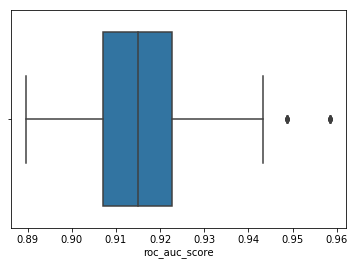

In [20]:
sns.boxplot(df_his['roc_auc_score'])

In [21]:
#sort GA result by roc_auc_score
df_his = df_his.sort_values(by=['roc_auc_score'], ascending=False)
display(df_his)

,bandwidth,features,kd,roc_auc_score,scaler,train_normal_file_index,y_score,y_true
520,0.033673,"[116, 117, 117, 104, 32]","KernelDensity(algorithm='auto', atol=0, bandwi...",0.958537,"MinMaxScaler(copy=True, feature_range=(0, 1))","[390, 193, 532, 166, 309, 163, 469, 254, 95, 3...","[-3.3636995036765667, -5.404363817803081, -5.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
525,0.033673,"[116, 117, 117, 104, 32]","KernelDensity(algorithm='auto', atol=0, bandwi...",0.958537,"MinMaxScaler(copy=True, feature_range=(0, 1))","[390, 193, 532, 166, 309, 163, 469, 254, 95, 3...","[-3.3636995036765667, -5.404363817803081, -5.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
529,0.033673,"[116, 117, 117, 104, 32]","KernelDensity(algorithm='auto', atol=0, bandwi...",0.958537,"MinMaxScaler(copy=True, feature_range=(0, 1))","[390, 193, 532, 166, 309, 163, 469, 254, 95, 3...","[-3.3636995036765667, -5.404363817803081, -5.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
527,0.033673,"[116, 117, 117, 104, 32]","KernelDensity(algorithm='auto', atol=0, bandwi...",0.958537,"MinMaxScaler(copy=True, feature_range=(0, 1))","[390, 193, 532, 166, 309, 163, 469, 254, 95, 3...","[-3.3636995036765667, -5.404363817803081, -5.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
526,0.033673,"[116, 117, 117, 104, 32]","KernelDensity(algorithm='auto', atol=0, bandwi...",0.958537,"MinMaxScaler(copy=True, feature_range=(0, 1))","[390, 193, 532, 166, 309, 163, 469, 254, 95, 3...","[-3.3636995036765667, -5.404363817803081, -5.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
528,0.033673,"[116, 117, 117, 104, 32]","KernelDensity(algorithm='auto', atol=0, bandwi...",0.958537,"MinMaxScaler(copy=True, feature_range=(0, 1))","[390, 193, 532, 166, 309, 163, 469, 254, 95, 3...","[-3.3636995036765667, -5.404363817803081, -5.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
524,0.033673,"[116, 117, 117, 104, 32]","KernelDensity(algorithm='auto', atol=0, bandwi...",0.958537,"MinMaxScaler(copy=True, feature_range=(0, 1))","[390, 193, 532, 166, 309, 163, 469, 254, 95, 3...","[-3.3636995036765667, -5.404363817803081, -5.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
523,0.033673,"[116, 117, 117, 104, 32]","KernelDensity(algorithm='auto', atol=0, bandwi...",0.958537,"MinMaxScaler(copy=True, feature_range=(0, 1))","[390, 193, 532, 166, 309, 163, 469, 254, 95, 3...","[-3.3636995036765667, -5.404363817803081, -5.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
522,0.033673,"[116, 117, 117, 104, 32]","KernelDensity(algorithm='auto', atol=0, bandwi...",0.958537,"MinMaxScaler(copy=True, feature_range=(0, 1))","[390, 193, 532, 166, 309, 163, 469, 254, 95, 3...","[-3.3636995036765667, -5.404363817803081, -5.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
521,0.033673,"[116, 117, 117, 104, 32]","KernelDensity(algorithm='auto', atol=0, bandwi...",0.958537,"MinMaxScaler(copy=True, feature_range=(0, 1))","[390, 193, 532, 166, 309, 163, 469, 254, 95, 3...","[-3.3636995036765667, -5.404363817803081, -5.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [22]:
#out_df_his = df_his.drop(['kd', 'scaler', 'y_score', 'y_true'], axis=1)
out_df_his = df_his.drop(['kd', 'scaler'], axis=1)
out_df_his.to_csv(save_dir + os.sep + df_his_name)

In [23]:
out_df_his.head()

,bandwidth,features,roc_auc_score,train_normal_file_index,y_score,y_true
520,0.033673,"[116, 117, 117, 104, 32]",0.958537,"[390, 193, 532, 166, 309, 163, 469, 254, 95, 3...","[-3.3636995036765667, -5.404363817803081, -5.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
525,0.033673,"[116, 117, 117, 104, 32]",0.958537,"[390, 193, 532, 166, 309, 163, 469, 254, 95, 3...","[-3.3636995036765667, -5.404363817803081, -5.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
529,0.033673,"[116, 117, 117, 104, 32]",0.958537,"[390, 193, 532, 166, 309, 163, 469, 254, 95, 3...","[-3.3636995036765667, -5.404363817803081, -5.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
527,0.033673,"[116, 117, 117, 104, 32]",0.958537,"[390, 193, 532, 166, 309, 163, 469, 254, 95, 3...","[-3.3636995036765667, -5.404363817803081, -5.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
526,0.033673,"[116, 117, 117, 104, 32]",0.958537,"[390, 193, 532, 166, 309, 163, 469, 254, 95, 3...","[-3.3636995036765667, -5.404363817803081, -5.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


select candidates of features

In [24]:
num_var = num_features
num_top = 500

top_features = df_his['features'][0:num_top]
top_features

520    [116, 117, 117, 104, 32]
525    [116, 117, 117, 104, 32]
529    [116, 117, 117, 104, 32]
527    [116, 117, 117, 104, 32]
526    [116, 117, 117, 104, 32]
528    [116, 117, 117, 104, 32]
524    [116, 117, 117, 104, 32]
523    [116, 117, 117, 104, 32]
522    [116, 117, 117, 104, 32]
521    [116, 117, 117, 104, 32]
569      [32, 113, 0, 104, 108]
562      [32, 113, 0, 104, 108]
563      [32, 113, 0, 104, 108]
564      [32, 113, 0, 104, 108]
565      [32, 113, 0, 104, 108]
566      [32, 113, 0, 104, 108]
567      [32, 113, 0, 104, 108]
568      [32, 113, 0, 104, 108]
560      [32, 113, 0, 104, 108]
561      [32, 113, 0, 104, 108]
888       [15, 109, 109, 54, 1]
889       [15, 109, 109, 54, 1]
887       [15, 109, 109, 54, 1]
886       [15, 109, 109, 54, 1]
885       [15, 109, 109, 54, 1]
880       [15, 109, 109, 54, 1]
883       [15, 109, 109, 54, 1]
882       [15, 109, 109, 54, 1]
881       [15, 109, 109, 54, 1]
884       [15, 109, 109, 54, 1]
                 ...           
817     

In [25]:
top_bandwidth = df_his['bandwidth'][0:num_top].drop_duplicates()
print(len(top_bandwidth))

50


In [26]:
_top_features_list = []

for ff in list(top_features):
    _top_features_list.extend(ff)

top_features_list = set(_top_features_list)

In [27]:
print('# of selected features:', len(top_features_list))
print(top_features_list)

# of selected features: 31
{0, 1, 5, 7, 13, 14, 15, 17, 18, 32, 44, 49, 51, 54, 55, 60, 75, 80, 87, 90, 95, 97, 104, 106, 108, 109, 112, 113, 116, 117, 118}


In [28]:
select_f = [ important_feature_names[chromosome] for chromosome in top_features_list ]
print(len(select_f))
select_f

31


['L-539-skewness_*R-257-kurtosis_-variance_',
 'L-140-no_zero_crossing_*R-1359-skewness_-median_',
 'L-468-skewness_*R-257-skewness_-max_',
 'L-140-no_zero_crossing_*R-93-mean_-median_',
 'L-140-no_zero_crossing_*R-656-kurtosis_-max_',
 'L-515-skewness_*R-257-skewness_-mean_',
 'L-1218-skewness_*R-257-kurtosis_-std_',
 'L-140-skewness_*R-257-min_-max_',
 'L-210-kurtosis_*R-820-skewness_-variance_',
 'L-140-skewness_*R-1125-median_-median_',
 'L-140-no_zero_crossing_*R-1125-median_-smoothness_',
 'L-468-kurtosis_*R-281-min_-peak_peak_amp_',
 'L-140-no_zero_crossing_*R-1125-kurtosis_-smoothness_',
 'L-1007-skewness_*R-281-min_-variance_',
 'L-960-skewness_*R-257-skewness_-std_',
 'L-140-skewness_*R-1031-peak_to_average_power_ratio_-min_',
 'L-140-skewness_*R-1125-median_-min_',
 'L-960-skewness_*R-257-skewness_-median_',
 'L-140-skewness_*R-1125-median_-max_',
 'L-140-no_zero_crossing_*R-1031-crest_factor_-smoothness_',
 'L-140-skewness_*R-1031-peak_to_average_power_ratio_-variance_',
 '

In [29]:
select_f_c = select_f
len(select_f_c)

31

### ②Feature selection and model parameters estimation using Train2

In [30]:
df_train2 = pd.merge(df_impt_feat, dfkey_train2.drop('label', axis=1), how='inner', on='file_index')

print(df_train2.shape)
display(df_train2)

print(df_train2['label'].value_counts())

df_test = pd.merge(df_impt_feat, dfkey_test.drop('label', axis=1), how='inner', on='file_index')

print(df_test.shape)
display(df_test)

(918, 131)


,L-539-skewness_*R-257-kurtosis_-variance_,L-140-no_zero_crossing_*R-1359-skewness_-median_,L-1218-skewness_*R-257-skewness_-max_,L-515-skewness_*R-257-skewness_-smoothness_,L-562-kurtosis_*R-257-min_-median_,L-468-skewness_*R-257-skewness_-max_,L-562-kurtosis_*R-257-min_-min_,L-140-no_zero_crossing_*R-93-mean_-median_,L-93-kurtosis_*R-257-min_-min_,L-468-skewness_*R-257-min_-max_,...,L-585-skewness_*R-234-skewness_-min_,L-140-skewness_*R-1125-median_-clearance_factor_,L-93-kurtosis_*R-1335-skewness_-impulse_factor_,L-703-skewness_*R-281-kurtosis_-max_,L-210-kurtosis_*R-257-min_-smoothness_,label,file_index,id,result,Car_Model0
0,0.000096,0.0,-0.008347,0.000108,-0.085187,0.045063,-0.783819,0.000000,-11.593669,0.394073,...,0.012687,4.142936,2.228674,0.038177,0.137760,0,0,405630,1,ESGAS
1,0.002577,0.0,0.004116,0.002818,0.061612,0.137226,-2.706780,0.000000,-1.462462,1.499280,...,0.003734,2.185202,0.952364,0.134160,0.334838,0,2,405634,1,RXHV
2,0.002350,0.0,0.004548,0.000059,-0.429841,0.015073,-2.129074,0.000000,-51.345912,0.699819,...,-0.002300,1.267599,1.242446,0.136670,0.483124,0,3,405638,1,ESHV
3,0.000853,0.0,0.032507,0.010023,-0.175733,-0.004253,-9.848626,0.000000,-3.756712,0.044873,...,-0.569067,2.771191,2.657376,0.004808,0.939329,0,4,405640,2,ESGAS
4,0.001002,0.0,0.043833,0.000741,-0.252250,0.000447,-0.523828,0.000000,-0.364665,0.106334,...,0.037543,1.990156,0.650538,0.017485,0.576343,0,5,405642,1,ESGAS
5,0.000011,0.0,0.005041,0.000006,-0.159663,0.010541,-0.974670,0.000000,-0.150343,0.332495,...,0.004797,1.848649,0.887606,0.010289,0.145196,0,6,405644,1,ESGAS
6,0.000417,0.0,0.026908,0.000088,0.290696,0.049914,0.011049,0.000000,-6.426937,0.885211,...,-0.020900,1.062708,1.379105,0.018665,0.480532,0,7,405646,1,RXﾀｰﾎﾞ
7,0.000480,0.0,0.037027,0.000176,0.796781,0.020008,0.256696,0.000000,-0.551671,0.508333,...,-0.034459,3.953054,0.899916,0.004325,0.663264,0,10,405652,1,RXﾀｰﾎﾞ
8,0.492557,0.0,0.166091,0.164331,-3.289983,0.411454,-7.543856,0.000000,0.374177,3.655783,...,-0.056969,2.341241,1.173004,0.223198,0.899348,0,12,405656,1,ESHV
9,0.004663,0.0,0.035537,0.000046,-0.308199,0.012490,-0.767100,0.000000,-0.091124,1.116971,...,0.011493,1.411240,1.091782,0.004145,0.413709,0,18,405666,1,RXﾀｰﾎﾞ


0    908
1     10
Name: label, dtype: int64
(378, 131)


,L-539-skewness_*R-257-kurtosis_-variance_,L-140-no_zero_crossing_*R-1359-skewness_-median_,L-1218-skewness_*R-257-skewness_-max_,L-515-skewness_*R-257-skewness_-smoothness_,L-562-kurtosis_*R-257-min_-median_,L-468-skewness_*R-257-skewness_-max_,L-562-kurtosis_*R-257-min_-min_,L-140-no_zero_crossing_*R-93-mean_-median_,L-93-kurtosis_*R-257-min_-min_,L-468-skewness_*R-257-min_-max_,...,L-585-skewness_*R-234-skewness_-min_,L-140-skewness_*R-1125-median_-clearance_factor_,L-93-kurtosis_*R-1335-skewness_-impulse_factor_,L-703-skewness_*R-281-kurtosis_-max_,L-210-kurtosis_*R-257-min_-smoothness_,label,file_index,id,result,Car_Model0
0,0.000868,0.000000,0.008732,0.000228,0.383553,0.137984,-0.038283,0.000000,-1.014457,0.431169,...,-0.096402,1.489966,1.435574,0.005211,0.558481,0,1,405632,1,RXﾀｰﾎﾞ
1,0.001136,0.000000,0.008095,0.000188,0.068215,0.039710,-0.551775,0.000000,-1.456833,0.320234,...,0.004168,2.027642,1.433971,0.013727,0.106304,0,8,405648,1,ESHV
2,0.000361,0.000000,-0.011533,0.000490,-0.443739,0.047237,-4.057683,0.000000,-2.749867,0.513417,...,-0.007553,1.847608,1.688161,0.051107,0.733937,0,9,405650,1,ESGAS
3,0.000090,1.266991,0.000114,0.000022,0.482328,0.005360,-0.501980,679.052342,-1.796705,0.156379,...,-0.028737,4.132534,1.068236,-0.000948,0.081334,0,15,405660,2,RXHV
4,0.000128,0.000000,0.013143,0.000312,0.106478,0.007156,-1.375936,0.000000,-6.821439,0.148034,...,-0.074629,2.168473,1.267107,0.004381,0.244478,0,24,405677,1,ESGAS
5,0.000646,0.000000,0.030813,0.000215,-0.286476,0.023817,-0.690988,0.000000,-5.949780,0.177250,...,0.016917,3.244943,0.625338,0.021095,0.385501,0,27,405683,2,ESGAS
6,0.004305,0.000000,0.012590,0.001459,0.554400,0.042653,-1.489752,0.000000,-1.065527,0.611982,...,-0.113271,2.253944,1.158151,0.073014,0.363502,0,34,405699,1,ESHV
7,0.000218,0.000000,0.003820,0.000023,-0.131716,0.007272,-3.257231,0.000000,-0.352736,0.489780,...,-0.015574,4.467462,1.128993,0.007290,0.226861,0,37,405706,1,RXﾀｰﾎﾞ
8,0.012194,0.000000,0.105286,0.000247,-2.145703,-0.043502,-2.460732,0.000000,-4.786322,1.336027,...,-0.031675,1.667070,0.769932,0.837897,0.077506,0,38,405708,2,RX-L GAS
9,0.002093,0.000000,0.031403,0.000536,0.035049,0.056461,-0.047358,0.000000,-0.625176,0.071623,...,-0.006049,1.882858,1.465474,0.134339,0.497331,0,39,405710,2,ESHV


In [31]:
select_f.append('label')
select_f

['L-539-skewness_*R-257-kurtosis_-variance_',
 'L-140-no_zero_crossing_*R-1359-skewness_-median_',
 'L-468-skewness_*R-257-skewness_-max_',
 'L-140-no_zero_crossing_*R-93-mean_-median_',
 'L-140-no_zero_crossing_*R-656-kurtosis_-max_',
 'L-515-skewness_*R-257-skewness_-mean_',
 'L-1218-skewness_*R-257-kurtosis_-std_',
 'L-140-skewness_*R-257-min_-max_',
 'L-210-kurtosis_*R-820-skewness_-variance_',
 'L-140-skewness_*R-1125-median_-median_',
 'L-140-no_zero_crossing_*R-1125-median_-smoothness_',
 'L-468-kurtosis_*R-281-min_-peak_peak_amp_',
 'L-140-no_zero_crossing_*R-1125-kurtosis_-smoothness_',
 'L-1007-skewness_*R-281-min_-variance_',
 'L-960-skewness_*R-257-skewness_-std_',
 'L-140-skewness_*R-1031-peak_to_average_power_ratio_-min_',
 'L-140-skewness_*R-1125-median_-min_',
 'L-960-skewness_*R-257-skewness_-median_',
 'L-140-skewness_*R-1125-median_-max_',
 'L-140-no_zero_crossing_*R-1031-crest_factor_-smoothness_',
 'L-140-skewness_*R-1031-peak_to_average_power_ratio_-variance_',
 '

In [32]:
df_train2.iloc[:, df_train2.columns.get_indexer(select_f)]

,L-539-skewness_*R-257-kurtosis_-variance_,L-140-no_zero_crossing_*R-1359-skewness_-median_,L-468-skewness_*R-257-skewness_-max_,L-140-no_zero_crossing_*R-93-mean_-median_,L-140-no_zero_crossing_*R-656-kurtosis_-max_,L-515-skewness_*R-257-skewness_-mean_,L-1218-skewness_*R-257-kurtosis_-std_,L-140-skewness_*R-257-min_-max_,L-210-kurtosis_*R-820-skewness_-variance_,L-140-skewness_*R-1125-median_-median_,...,L-1007-skewness_*R-257-skewness_-skewness_,L-140-skewness_*R-1125-median_-peak_peak_amp_,L-93-kurtosis_*R-281-min_-smoothness_,L-93-kurtosis_*R-820-skewness_-max_,L-562-skewness_*R-281-skewness_-kurtosis_,L-562-kurtosis_*R-281-min_-crest_factor_,L-93-kurtosis_*R-820-skewness_-crest_factor_,L-562-kurtosis_*R-281-min_-skewness_,L-93-kurtosis_*R-820-skewness_-kurtosis_,label
0,0.000096,0.0,0.045063,0.000000,0.151707,0.009400,0.031511,0.911648,0.000583,0.049896,...,-1.402100,0.454461,0.948001,0.348632,-1.467128,1.461612,2.233537,0.219919,0.245991,0
1,0.002577,0.0,0.137226,0.000000,-0.000000,-0.016047,0.030644,0.721972,0.003517,0.074082,...,1.777719,0.188431,0.225743,0.073855,-1.269244,2.320004,2.175592,-1.471478,-0.242734,0
2,0.002350,0.0,0.015073,0.000000,0.000000,0.003993,0.056003,1.614112,0.000045,0.101552,...,-0.208345,0.054745,0.996967,0.311828,-1.269921,1.951169,1.807534,-0.919222,-0.844925,0
3,0.000853,0.0,-0.004253,0.000000,-0.000000,-0.027280,0.038843,0.741747,0.104342,-0.067730,...,1.752639,0.194928,0.547224,0.010182,-1.343169,2.436832,2.446214,-1.749348,1.176973,0
4,0.001002,0.0,0.000447,0.000000,-0.000000,0.052650,0.040234,0.081182,0.002699,0.042116,...,0.034795,0.067253,0.232151,0.048159,-1.119002,1.527012,1.616586,-0.038684,-1.674009,0
5,0.000011,0.0,0.010541,0.000000,0.000000,0.001628,0.002674,-0.052797,0.000220,0.008074,...,1.039589,0.097280,0.028593,0.014015,-0.906227,1.398663,1.728169,0.090754,-1.468071,0
6,0.000417,0.0,0.049914,0.000000,0.000000,-0.001714,0.025548,0.826106,0.000061,-0.188425,...,0.959334,0.025926,0.174404,-0.038360,-1.726725,1.774209,1.717727,0.930414,-1.035874,0
7,0.000480,0.0,0.020008,0.000000,0.000000,0.015550,0.013400,0.374750,0.000199,0.014747,...,-1.364128,0.119105,0.175379,0.034416,-1.379332,1.302979,1.373676,-1.247945,-0.973159,0
8,0.492557,0.0,0.411454,0.000000,0.000000,0.520098,0.233965,8.415860,0.013027,-0.310886,...,-1.275817,0.648241,0.650216,0.098140,-1.418907,1.464312,1.516122,-0.451556,0.150243,0
9,0.004663,0.0,0.012490,0.000000,0.000000,0.009120,0.096928,0.726544,0.000329,0.204375,...,0.641996,0.155070,0.434776,0.021182,-1.678500,1.736559,1.799520,-0.218729,-1.383971,0


In [33]:
#for cc in select_f_c:
#    df_train2
df_train2[select_f_c].describe()

,L-539-skewness_*R-257-kurtosis_-variance_,L-140-no_zero_crossing_*R-1359-skewness_-median_,L-468-skewness_*R-257-skewness_-max_,L-140-no_zero_crossing_*R-93-mean_-median_,L-140-no_zero_crossing_*R-656-kurtosis_-max_,L-515-skewness_*R-257-skewness_-mean_,L-1218-skewness_*R-257-kurtosis_-std_,L-140-skewness_*R-257-min_-max_,L-210-kurtosis_*R-820-skewness_-variance_,L-140-skewness_*R-1125-median_-median_,...,L-1007-skewness_*R-257-skewness_-skewness_,L-140-skewness_*R-1125-median_-peak_peak_amp_,L-93-kurtosis_*R-281-min_-smoothness_,L-93-kurtosis_*R-820-skewness_-max_,L-562-skewness_*R-281-skewness_-kurtosis_,L-562-kurtosis_*R-281-min_-crest_factor_,L-93-kurtosis_*R-820-skewness_-crest_factor_,L-562-kurtosis_*R-281-min_-skewness_,L-93-kurtosis_*R-820-skewness_-kurtosis_,label
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,9.180000e+02,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.062803,-0.002837,0.059331,3.162582,0.072873,0.013662,0.074433,0.798640,3.494959e-02,-0.051094,...,0.012803,0.286216,0.485152,0.083574,-0.798923,1.708104,1.771768,0.022719,-0.870623,0.010893
std,0.625218,0.061841,0.103319,31.664019,0.589453,0.060134,0.255337,2.278349,2.886617e-01,0.236738,...,0.814226,0.294793,0.300397,0.356449,0.626725,0.274859,0.260712,0.733314,0.597774,0.103857
min,0.000002,-0.801936,-0.134547,0.000000,-0.000000,-0.317047,0.001230,-1.832185,3.957152e-07,-2.632415,...,-1.787576,0.008621,0.001614,-1.506909,-2.000000,1.092985,1.173116,-1.780442,-2.000000,0.000000
25%,0.000273,0.000000,0.010897,0.000000,0.000000,-0.004603,0.015349,0.120283,2.871584e-04,-0.135014,...,-0.586593,0.119686,0.206419,0.009948,-1.321746,1.493092,1.573649,-0.455581,-1.371866,0.000000
50%,0.001175,0.000000,0.031991,0.000000,0.000000,0.004196,0.031388,0.377341,1.077791e-03,-0.028986,...,0.051880,0.207892,0.493935,0.039380,-0.802878,1.697243,1.769628,-0.014356,-0.912025,0.000000
75%,0.005756,0.000000,0.068429,0.000000,0.000000,0.020068,0.068899,0.836249,4.788208e-03,0.058475,...,0.596130,0.350299,0.745309,0.096138,-0.325318,1.910218,1.965422,0.509810,-0.438890,0.000000
max,11.189637,1.239889,1.311824,725.086167,12.061382,0.570894,4.899394,55.103993,5.670030e+00,0.928486,...,1.779643,3.116528,0.998798,9.452541,1.197955,2.447016,2.449241,1.776670,1.198339,1.000000


In [34]:
#for cc in select_f_c:
#    df_train2[cc].values

for cc in list(select_f_c):
    for rr in range(len(df_train2)):
        if np.isnan( df_train2[cc][rr] ) == True:
            print('nan ',cc)
        if np.isinf( df_train2[cc][rr] ) == True:
            print('inf ',cc)
    

Definition of method to draw box-plot

In [35]:
from scipy.stats import wasserstein_distance

def calc_norm_emd(x1, x2):
    x1v = x1.values.copy() if hasattr(x1, 'values') else x1.copy()
    x2v = x2.values.copy() if hasattr(x2, 'values') else x2.copy()
    xv = np.concatenate([x1v, x2v])
    xv = (xv - xv.mean()) / xv.std()
    emd_norm = wasserstein_distance(xv[:len(x1v)], xv[len(x1v):])
    return emd_norm

def boxplot_df(df, df_t=None, plot_size=10, target_label=0, target_label2=None, n_col=10, df_emd_csv=None):

    df_ = df
    df_target = df_[df_['label'] == target_label]
    if target_label2 == None:
        df_not_target = df_[df_['label'] != target_label]
    else:
        df_not_target = df_[df_['label'] == target_label2]
    df_wasserstein_distance = pd.DataFrame([{
        'wasserstein_distance': calc_norm_emd(df_target[col], df_not_target[col]),
        'feature_index':col
    } for col in df_.columns.drop(['label'])])
    
    df_emd = df_wasserstein_distance
    
    if df_t is not None:
        df_test_ = df_t
        df_test_target = df_test_[df_test_['label'] == target_label]
        if target_label2 == None:
            df_test_not_target = df_test_[df_test_['label'] != target_label]
        else:
            df_test_not_target = df_test_[df_test_['label'] == target_label2]
            
        df_test_wasserstein_distance = pd.DataFrame([{
            'wasserstein_distance_test': calc_norm_emd(df_test_target[col], df_test_not_target[col]),
            'feature_index':col
        } for col in df_test_.columns.drop(['label'])])
        
        df_emd = pd.merge(df_wasserstein_distance, df_test_wasserstein_distance, how='left', on='feature_index')
        
        display( df_emd )
        
    if df_emd_csv != None:
        df_emd.to_csv(df_emd_csv)
    
    
    plot_features = df_wasserstein_distance.sort_values(
        by=['wasserstein_distance'], ascending=False
    ).head(plot_size)['feature_index']
    
    
    
    print("plot_features \n", plot_features)

    n_features = len(plot_features)
    n_row = int(n_features/n_col)
    if n_features % n_col != 0:
        n_row = n_row+1
    fig = plt.figure(figsize=(4*n_col, 5*n_row))
    for i, c in enumerate(plot_features):
        ax = fig.add_subplot(n_row, n_col, i+1)
        sns.boxplot(x="label", y=c, data=df_)
    return plot_features

,feature_index,wasserstein_distance,wasserstein_distance_test
0,L-539-skewness_*R-257-kurtosis_-variance_,0.094091,0.623328
1,L-140-no_zero_crossing_*R-1359-skewness_-median_,0.097864,0.126590
2,L-468-skewness_*R-257-skewness_-max_,0.235371,2.108988
3,L-140-no_zero_crossing_*R-93-mean_-median_,0.101034,0.132545
4,L-140-no_zero_crossing_*R-656-kurtosis_-max_,0.125058,0.187405
5,L-515-skewness_*R-257-skewness_-mean_,0.337405,0.764722
6,L-1218-skewness_*R-257-kurtosis_-std_,0.139929,0.701301
7,L-140-skewness_*R-257-min_-max_,0.189139,0.330923
8,L-210-kurtosis_*R-820-skewness_-variance_,0.121695,0.382910
9,L-140-skewness_*R-1125-median_-median_,0.307222,0.381295


plot_features 
 24                L-93-kurtosis_*R-281-min_-smoothness_
13                L-1007-skewness_*R-281-min_-variance_
18                  L-140-skewness_*R-1125-median_-max_
30             L-93-kurtosis_*R-820-skewness_-kurtosis_
29                 L-562-kurtosis_*R-281-min_-skewness_
17              L-960-skewness_*R-257-skewness_-median_
5                 L-515-skewness_*R-257-skewness_-mean_
23        L-140-skewness_*R-1125-median_-peak_peak_amp_
22           L-1007-skewness_*R-257-skewness_-skewness_
21           L-1218-skewness_*R-257-skewness_-skewness_
9                L-140-skewness_*R-1125-median_-median_
15    L-140-skewness_*R-1031-peak_to_average_power_r...
28         L-93-kurtosis_*R-820-skewness_-crest_factor_
25                  L-93-kurtosis_*R-820-skewness_-max_
27             L-562-kurtosis_*R-281-min_-crest_factor_
11            L-468-kurtosis_*R-281-min_-peak_peak_amp_
2                  L-468-skewness_*R-257-skewness_-max_
14                 L-960-skewnes

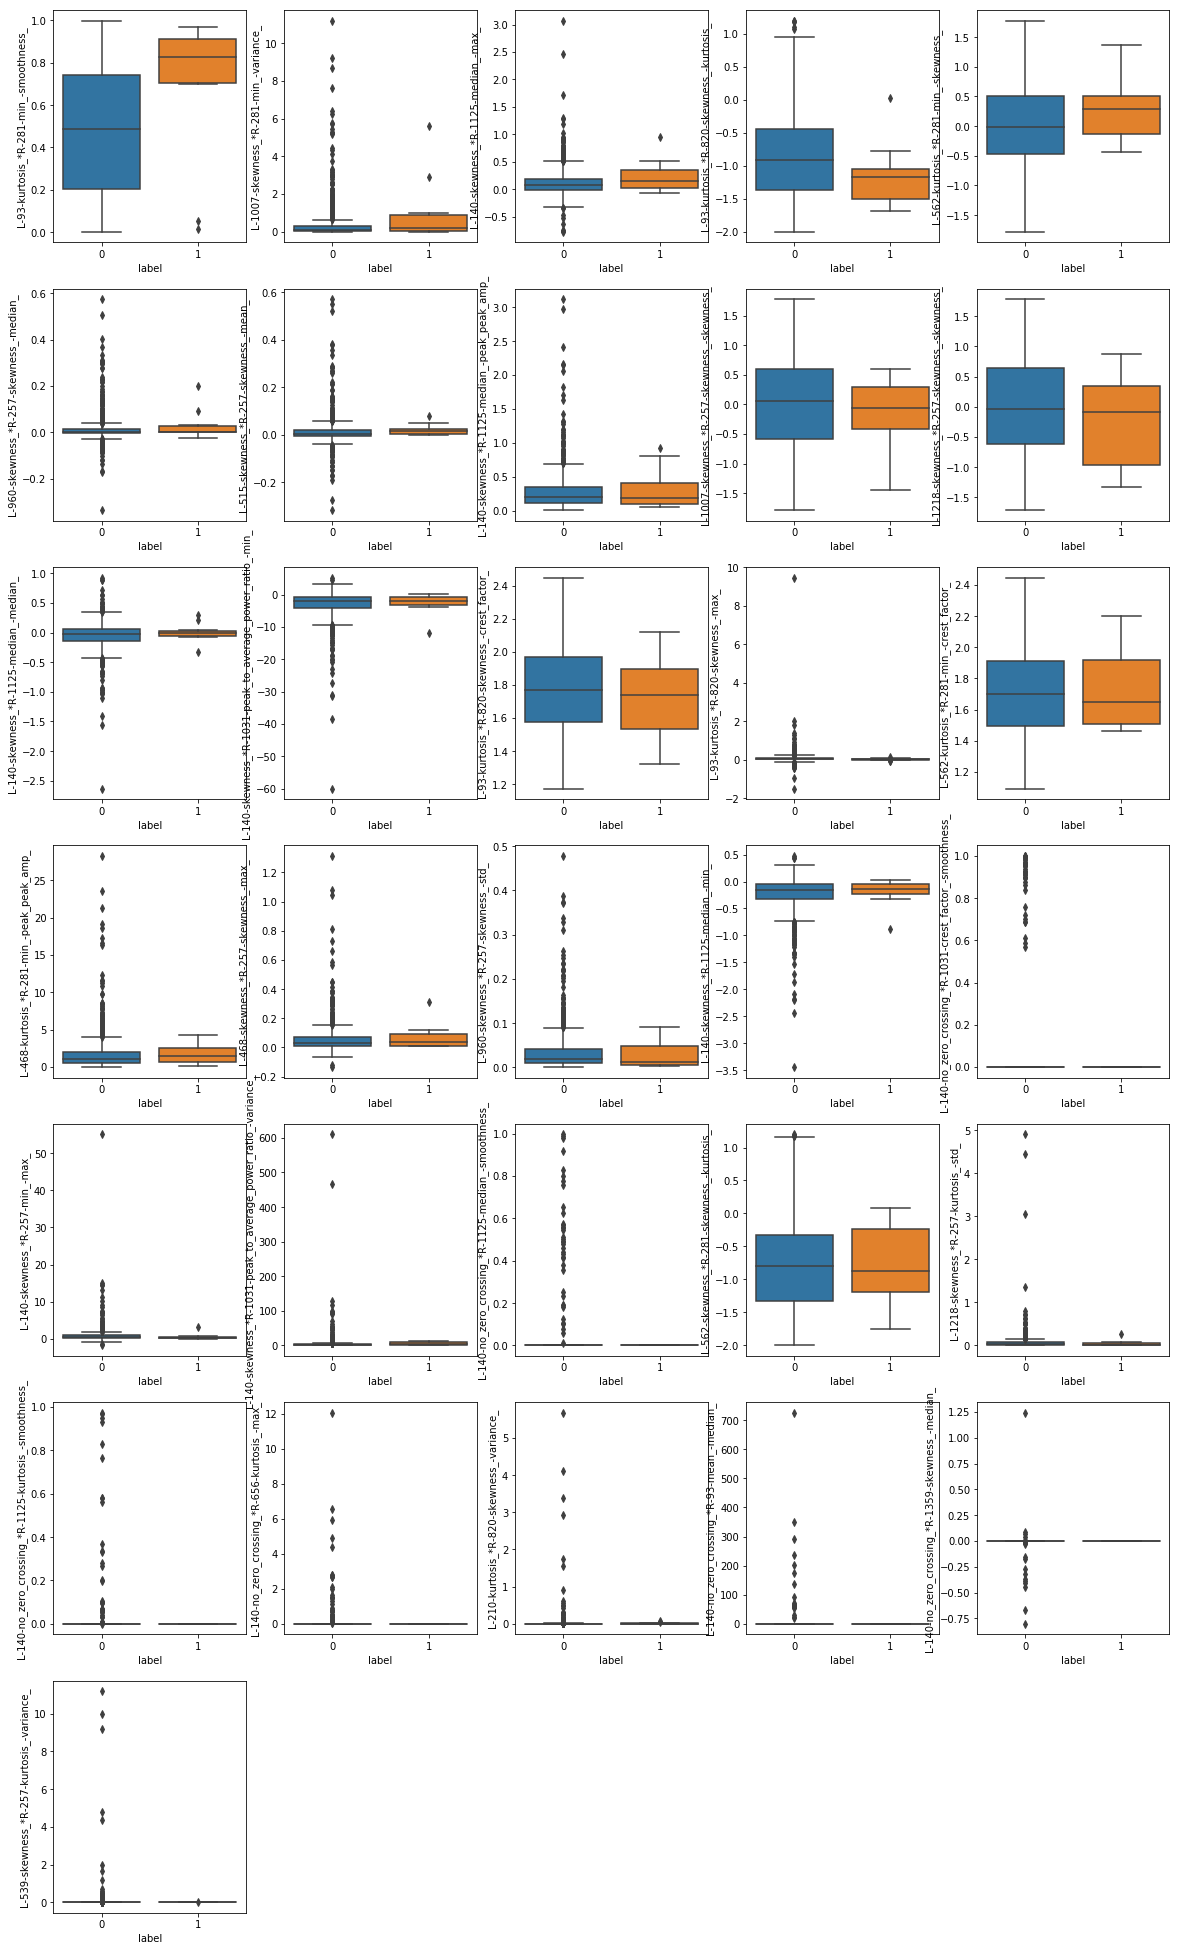

In [36]:
plot_features = boxplot_df(df_train2.iloc[:, df_train2.columns.get_indexer(select_f)],\
           df_t=df_test.iloc[:, df_test.columns.get_indexer(select_f)], \
           plot_size=len(top_features_list), target_label=0, target_label2=None, n_col=5,\
           df_emd_csv=out_edm_csv)

In [37]:
#df_train2[select_f_c].values.columns[np.isnan(X).any()]
check = np.isfinite(df_train2[select_f_c].values)

print(check.shape)
for rr in range(check.shape[0]):
    for cc in range(check.shape[1]):
        if check[int(rr),int(cc)]==False:
            print(cc)

(918, 32)


In [38]:
check.shape[0]

918

### From the above result, finally selected features are set by hand

In [39]:
#finally_select_f = [
#    ['L-1101-min_*R-1195-crest_factor_-min_', 'L-1101-min_*R-1195-peak_to_average_power_ratio_-mean_', 'L-1101-min_*R-867-clearance_factor_-min_'],
#    ['L-1101-min_*R-1195-crest_factor_-min_', 'L-1101-min_*R-1195-peak_to_average_power_ratio_-mean_', 'L-1101-min_*R-1195-clearance_factor_-median_'],
#    ['L-1101-min_*R-1195-peak_to_average_power_ratio_-mean_', 'L-1101-min_*R-867-clearance_factor_-min_', 'L-1101-min_*R-1195-clearance_factor_-median_']
#]

candidate_feat_list = [
    'L-515-skewness_*R-257-skewness_-mean_',
    'L-1007-skewness_*R-281-min_-variance_',
    'L-140-skewness_*R-1031-peak_to_average_power_ratio_-min_',
    'L-960-skewness_*R-257-skewness_-median_',
    'L-1218-skewness_*R-257-skewness_-skewness_',
    'L-93-kurtosis_*R-820-skewness_-max_',
    'L-93-kurtosis_*R-820-skewness_-kurtosis_'

]   
candidate_feat_list = plot_features.tolist()[:7]

finally_select_f = []

for ii in range (0, len(candidate_feat_list)-4):
    for jj in range(ii+1, len(candidate_feat_list)-3):
        for kk in range(jj+1, len(candidate_feat_list)-2):
            for ll in range(kk+1, len(candidate_feat_list)-1):
                for mm in range(ll+1, len(candidate_feat_list)):
                    #print(main_var_list[ii], main_var_list[jj], main_var_list[kk])
                    list_elmnt = [candidate_feat_list[ii], candidate_feat_list[jj], candidate_feat_list[kk], candidate_feat_list[ll], candidate_feat_list[mm]]
                    finally_select_f.append(list_elmnt)
            
print(len(finally_select_f))
print(finally_select_f)

21
[['L-93-kurtosis_*R-281-min_-smoothness_', 'L-1007-skewness_*R-281-min_-variance_', 'L-140-skewness_*R-1125-median_-max_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-562-kurtosis_*R-281-min_-skewness_'], ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-1007-skewness_*R-281-min_-variance_', 'L-140-skewness_*R-1125-median_-max_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-960-skewness_*R-257-skewness_-median_'], ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-1007-skewness_*R-281-min_-variance_', 'L-140-skewness_*R-1125-median_-max_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-515-skewness_*R-257-skewness_-mean_'], ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-1007-skewness_*R-281-min_-variance_', 'L-140-skewness_*R-1125-median_-max_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-960-skewness_*R-257-skewness_-median_'], ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-1007-skewness_*R-281-min_-variance_', 'L-140-skewness_*R-1125-median_-max_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-

In [ ]:
%%time
#kd_f = train_kd(X_train2, bandwidth, 'gaussian')

res_mdl = []
_cnt=0
for feat_f in tqdm.tqdm_notebook( list(finally_select_f) ):
    print('feat_f', feat_f)
    _tmp_df = df_train2[df_train2['label']==0]
    #X_train2 = _tmp_df.iloc[:,_tmp_df.columns.get_indexer(feat_f)]
    X_train2 = _tmp_df.loc[:,feat_f]
    #display(X_train2)
    #print(X_train2.columns)

    #print('MinMax')
    scaler = MinMaxScaler()
    scaler.fit(X_train2)
    X_train2 = scaler.transform(X_train2)
    #print(X_train2)
    param = {'bandwidth':np.array(top_bandwidth)}
    #print(param)

    #print('grid')
    model = GridSearchCV(
        estimator = KernelDensity(kernel='gaussian'),
        param_grid = param,
        cv = 10)

    #print('model fit')
    model.fit(X_train2)
    
    best_model = model.best_estimator_
    #print(best_model)
    best_param = model.best_params_
    #print(best_param)
    
    res_mdl.append({
        'features':df_train2.columns.get_indexer(feat_f),
        'feature_names':feat_f,
        'kd':best_model,
        'scaler':scaler,
        'bandwidth':best_param.values()
    })
    
    print('cnt', _cnt)
    _cnt += 1

    print('')

df_res_mdl = pd.DataFrame(res_mdl)

feat_f ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-1007-skewness_*R-281-min_-variance_', 'L-140-skewness_*R-1125-median_-max_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-562-kurtosis_*R-281-min_-skewness_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 0

feat_f ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-1007-skewness_*R-281-min_-variance_', 'L-140-skewness_*R-1125-median_-max_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-960-skewness_*R-257-skewness_-median_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 1

feat_f ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-1007-skewness_*R-281-min_-variance_', 'L-140-skewness_*R-1125-median_-max_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-515-skewness_*R-257-skewness_-mean_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 2

feat_f ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-1007-skewness_*R-281-min_-variance_', 'L-140-skewness_*R-1125-median_-max_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-960-skewness_*R-257-skewness_-median_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 3

feat_f ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-1007-skewness_*R-281-min_-variance_', 'L-140-skewness_*R-1125-median_-max_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-515-skewness_*R-257-skewness_-mean_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 4

feat_f ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-1007-skewness_*R-281-min_-variance_', 'L-140-skewness_*R-1125-median_-max_', 'L-960-skewness_*R-257-skewness_-median_', 'L-515-skewness_*R-257-skewness_-mean_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 5

feat_f ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-1007-skewness_*R-281-min_-variance_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-960-skewness_*R-257-skewness_-median_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 6

feat_f ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-1007-skewness_*R-281-min_-variance_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-515-skewness_*R-257-skewness_-mean_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 7

feat_f ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-1007-skewness_*R-281-min_-variance_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-960-skewness_*R-257-skewness_-median_', 'L-515-skewness_*R-257-skewness_-mean_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 8

feat_f ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-1007-skewness_*R-281-min_-variance_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-960-skewness_*R-257-skewness_-median_', 'L-515-skewness_*R-257-skewness_-mean_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 9

feat_f ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-140-skewness_*R-1125-median_-max_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-960-skewness_*R-257-skewness_-median_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 10

feat_f ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-140-skewness_*R-1125-median_-max_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-515-skewness_*R-257-skewness_-mean_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 11

feat_f ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-140-skewness_*R-1125-median_-max_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-960-skewness_*R-257-skewness_-median_', 'L-515-skewness_*R-257-skewness_-mean_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 12

feat_f ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-140-skewness_*R-1125-median_-max_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-960-skewness_*R-257-skewness_-median_', 'L-515-skewness_*R-257-skewness_-mean_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 13

feat_f ['L-93-kurtosis_*R-281-min_-smoothness_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-960-skewness_*R-257-skewness_-median_', 'L-515-skewness_*R-257-skewness_-mean_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 14

feat_f ['L-1007-skewness_*R-281-min_-variance_', 'L-140-skewness_*R-1125-median_-max_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-960-skewness_*R-257-skewness_-median_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 15

feat_f ['L-1007-skewness_*R-281-min_-variance_', 'L-140-skewness_*R-1125-median_-max_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-515-skewness_*R-257-skewness_-mean_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 16

feat_f ['L-1007-skewness_*R-281-min_-variance_', 'L-140-skewness_*R-1125-median_-max_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-960-skewness_*R-257-skewness_-median_', 'L-515-skewness_*R-257-skewness_-mean_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 17

feat_f ['L-1007-skewness_*R-281-min_-variance_', 'L-140-skewness_*R-1125-median_-max_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-960-skewness_*R-257-skewness_-median_', 'L-515-skewness_*R-257-skewness_-mean_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 18

feat_f ['L-1007-skewness_*R-281-min_-variance_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-960-skewness_*R-257-skewness_-median_', 'L-515-skewness_*R-257-skewness_-mean_']


/home/ubuntu/anaconda3/envs/dang_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cnt 19

feat_f ['L-140-skewness_*R-1125-median_-max_', 'L-93-kurtosis_*R-820-skewness_-kurtosis_', 'L-562-kurtosis_*R-281-min_-skewness_', 'L-960-skewness_*R-257-skewness_-median_', 'L-515-skewness_*R-257-skewness_-mean_']


In [ ]:
df_res_mdl

### ③Out-samples evaluation

In [ ]:
boxplot_df(df_test.iloc[:, df_test.columns.get_indexer(select_f)], plot_size=len(top_features_list), target_label=0, target_label2=None, n_col=5)

In [ ]:
from sklearn.metrics import roc_auc_score

y_preds = []
auc_test = []
for i,row in df_res_mdl.iterrows():
    _feat_cols = row['features']
    #print('_feat_cols', _feat_cols)
    
    #print(df_test[important_feature_names].iloc[:, _feat_cols].columns )
    print(df_test.iloc[:, _feat_cols].columns )
    
    #display(df_test[important_feature_names].iloc[:, _feat_cols])
    #display(df_test.iloc[:, _feat_cols])
    
    _X_test_scl = row['scaler'].transform(
        #df_test[important_feature_names].values[:, _feat_cols]#.astype('float64')
        df_test.values[:, _feat_cols].astype('float64')
    )
    
    #print(_X_test_scl)
    
    y_pred = calc_kd_anomaly_score(_X_test_scl, row['kd'])
    y_preds.append(y_pred)
    auc_test.append(roc_auc_score(df_test['label'], y_pred))

df_test_res = pd.DataFrame()
df_test_res['auc_test'] = auc_test
df_test_res['y_preds'] = y_preds
df_test_res['features'] = df_res_mdl['features'].copy()
df_test_res['feature_names'] = df_res_mdl['feature_names'].copy()
df_test_res['bandwidth'] = df_res_mdl['bandwidth'].copy()
df_test_res['auc_test2'] = np.abs(df_test_res['auc_test'] - 0.5)
df_test_res = df_test_res.sort_values(by='auc_test', ascending=False).reset_index(drop=True)


In [ ]:
df_test_res

In [ ]:
df_test_res.to_csv(save_dir + os.sep + df_test_res_name)

## You do not neet to exectute the following parts   
## The final model will be built with Left, Right alone terms

In [ ]:
y_test = df_test['label'].values

In [ ]:
df_test.iloc[:, df_test_res['features'][0]].head()

In [ ]:
import statsmodels.api as sm
import pylab as pl
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score


def thresholds(y_true, y_score,_display=False):
    N_tot = len(y_true)
    N_ok = len(y_true[y_true == 0])
    N_ng = len(y_true[y_true == 1])
    
    print(N_tot, N_ok, N_ng)
    
    fpr, tpr, thresholds =roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    i = np.arange(len(tpr)) # index for df
    roc = pd.DataFrame({
        'fpr' : pd.Series(fpr, index=i),
        'tpr' : pd.Series(tpr, index = i), 
        '1-fpr' : pd.Series(1-fpr, index = i), 
        'tf' : pd.Series(tpr - (1-fpr), index = i), 
        'thresholds' : pd.Series(thresholds, index = i),
        'accuracy' : pd.Series(tpr*N_ng/N_tot + (1-fpr)*N_ok/N_tot, index = i)
    })
    
    
    roc.ix[(roc.tf-0).abs().argsort()[:1]]
    roc['total']=roc['tpr']+roc['1-fpr']
    roc['diff']=np.abs(roc['tpr']-roc['1-fpr'])
    
    if _display == True:
        display(roc)
    
    best_ad_threshold = roc.sort_values(by=['tpr', 'thresholds'], ascending=[False,False]).head(1)['thresholds'].values[0]
    #best_ad_threshold = roc.sort_values(by=['tpr'], ascending=False).head(1)['thresholds'].values[0]
    best_nd_threshold = roc.sort_values(by=['1-fpr'], ascending=False).head(1)['thresholds'].values[0]
    #best_threshold = roc.sort_values(by=['total'], ascending=False).head(1)['thresholds'].values[0]
    best_threshold = roc.sort_values(by=['diff'], ascending=True).head(1)['thresholds'].values[0]
    
    #!! 2019/2/14 Komine best threshold is determined by accuracy, not tpr + (1-fpr)
    #best_threshold = roc.sort_values(by=['accuracy'], ascending=False).head(1)['thresholds'].values[0]
    
    nd_accuracy_100ad = roc.sort_values(by=['tpr'], ascending=False).head(1)['1-fpr'].values[0]
    ad_accuracy_100nd = roc.sort_values(by=['1-fpr'], ascending=False).head(1)['tpr'].values[0]
    
    return roc, best_ad_threshold, best_nd_threshold, best_threshold,nd_accuracy_100ad,ad_accuracy_100nd

# Plot tpr vs 1-fpr
def thresholdplot(df_roc):
    fig, ax = pl.subplots()
    plt.xlim(-4,6)
    pl.plot(df_roc['thresholds'], df_roc['tpr'])
    pl.plot(df_roc['thresholds'], df_roc['1-fpr'], color = 'red')
    pl.plot(df_roc['thresholds'], df_roc['diff'], color = 'green')
    #pl.plot(df_roc['tpr'])
    #pl.plot(df_roc['1-fpr'], color = 'red')
    #pl.plot(df_roc['accuracy'], color = 'green')
    #pl.xlabel('1-False Positive Rate')

In [ ]:
%%time
nd_accuracy_100ad_list = []
ad_accuracy_100nd_list = []
for index, row in df_test_res.iterrows():
    y_pred = row['y_preds']
    _,_,_,_, nd_accuracy_100ad, ad_accuracy_100nd = thresholds(y_test, y_pred)
    nd_accuracy_100ad_list.append(nd_accuracy_100ad)
    ad_accuracy_100nd_list.append(ad_accuracy_100nd)
df_test_res['nd_accuracy_100ad'] = nd_accuracy_100ad_list
df_test_res['ad_accuracy_100nd'] = ad_accuracy_100nd_list

In [ ]:
df_test_res

In [ ]:
#score of best model
y_pred = df_test_res.loc[df_test_res['auc_test'].idxmax(), 'y_preds']

In [ ]:
#threshold of best model
df_roc,best_ad_threshold, best_nd_threshold, best_threshold,_,_ = thresholds(y_test, y_pred, _display=True)

In [ ]:
thresholdplot(df_roc)

In [ ]:
print(best_ad_threshold)
print(best_nd_threshold)
print(best_threshold)

In [ ]:
#best_ad_threshold = -2.988166

In [ ]:
feature_index = df_test_res.loc[df_test_res['auc_test'].idxmax(), 'features']
best_bandwidth = list( df_test_res.loc[df_test_res['auc_test'].idxmax(), 'bandwidth'] )[0]

print(feature_index)
print(best_bandwidth)

In [ ]:
import itertools
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          ylabel = 'True label',
                          xlabel = 'Predicted label',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #     print("Normalized confusion matrix")
    # else:
    #     print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return

In [ ]:
plot_confusion_matrix(y_test, np.where(y_pred>=best_threshold,1,0), classes=['normal','abnormal'])

In [ ]:
plot_confusion_matrix(y_test, np.where(y_pred>=best_ad_threshold,1,0), classes=['normal','abnormal'])

In [ ]:
df_best_result = pd.DataFrame({'label':y_test, 'y_pred':y_pred, 'index':np.arange(len(y_pred))})
#q3 = np.percentile(df_best_result[df_best_result['label']==1]['y_pred'], 75)
sns.boxplot(x="label", y="y_pred", data=df_best_result)
#plt.ylim(-5,10)

④Validation of Robustness   
Now all train and test data are used.

In [ ]:
normal_file_index_all = df_impt_feat[df_impt_feat['label']==0]['file_index'].tolist()
print(len(normal_file_index_all))
print(normal_file_index_all)

abnormal_file_index_all = df_impt_feat[df_impt_feat['label']==1]['file_index'].tolist()
print(len(abnormal_file_index_all))
print(abnormal_file_index_all)

In [ ]:
n_iter2 = 100
rndseed3 = 1111

random.seed(rndseed3)

train_normal_file_index_all_list = []

for i in np.arange(n_iter2):
    train_normal_file_index_all = random.sample(list(normal_file_index_all), int(len(normal_file_index_all)*0.7))
    #print(train_normal_file_index_all)
    train_normal_file_index_all_list.append(train_normal_file_index_all)
    
print(len(train_normal_file_index_all_list))
print(len(train_normal_file_index_all_list[0]))


In [ ]:
individual = feature_index
select_i = [important_feature_names[chromosome] for chromosome in individual]
print('select_i', select_i)
#bandwidth = .63
bandwidth = best_bandwidth
print(bandwidth)

best_ad_accuracy_list = []
best_accuracy_list = []

print('train_normal_file_index_all_list', len(train_normal_file_index_all_list))

for train_normal_file_index in train_normal_file_index_all_list:
        
        test_normal_file_index = [index for index in list(normal_file_index_all) if index not in train_normal_file_index]
        

        X_train = df_impt_feat[df_impt_feat['file_index'].isin(train_normal_file_index)].iloc[:, df_impt_feat.columns.get_indexer(select_i)]
        X_test = df_impt_feat[df_impt_feat['file_index'].isin(test_normal_file_index)].iloc[:, df_impt_feat.columns.get_indexer(select_i)]
        X_test_abnormal = df_impt_feat[df_impt_feat['file_index'].isin(abnormal_file_index_all)].iloc[:, df_impt_feat.columns.get_indexer(select_i)]
        
        #to check
        print('X_test_abnormal', X_test_abnormal.shape)
        print('X_train', X_train.shape)
        print('X_test', X_test.shape)
        print('bandwidth', bandwidth)

        try:
            scaler = MinMaxScaler()
            scaler.fit(X_train)
            X_train_scl = scaler.transform(X_train)
            X_test_scl = scaler.transform(X_test)
            X_test_abnormal_scl = scaler.transform(X_test_abnormal)
        
            kd = train_kd(X_train_scl, bandwidth, 'gaussian')
            
            kd_normal_scores = calc_kd_anomaly_score(X_test_scl, kd)
            kd_abnormal_scores = calc_kd_anomaly_score(X_test_abnormal_scl, kd)
        except Exception as e:
            raise Exception('{} {} {}'.format(X_test.shape, X_test_abnormal.shape, X_train.shape))
            

        y_score = np.concatenate([kd_normal_scores,kd_abnormal_scores])
        y_true = np.concatenate([np.zeros(len(kd_normal_scores)),np.zeros(len(kd_abnormal_scores))+1])
        
        print('y_score', len(y_score))
        
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc_score = auc(fpr, tpr)
        
        from sklearn.metrics import confusion_matrix
        
        df_roc,best_ad_threshold, best_nd_threshold, best_threshold,nd_accuracy_100ad,ad_accuracy_100nd = thresholds(y_true, y_score)
        
        #best_nd_threshold
        cm = confusion_matrix(y_true, np.where(y_score>=best_ad_threshold,1,0))
        recall = cm[1][1]/np.sum(cm[1])
        mistake_nd_rate = cm[0][1]/np.sum(cm[0])
        best_ad_accuracy_list.append({'recall':recall, 'mistake_detection_rate':mistake_nd_rate})
        
        #best_threshold
        cm = confusion_matrix(y_true, np.where(y_score>=best_threshold,1,0))
        recall = cm[1][1]/np.sum(cm[1])
        mistake_nd_rate = cm[0][1]/np.sum(cm[0])
        best_accuracy_list.append({'recall':recall, 'mistake_detection_rate':mistake_nd_rate})

        

df_best_ad_accuracy = pd.DataFrame(best_ad_accuracy_list)
df_best_ad_accuracy['index'] = np.arange(len(best_ad_accuracy_list))
df_best_accuracy = pd.DataFrame(best_accuracy_list)
df_best_accuracy['index'] = np.arange(len(best_accuracy_list))   

In [ ]:
df_best_ad_accuracy.to_pickle('./data/253_df_best_ad_accuracy.pkl')
df_best_accuracy.to_pickle('./data/253_df_best_accuracy.pkl')

In [ ]:
df_best_accuracy

In [ ]:
list_data = [df_best_ad_accuracy.loc[:, "recall"], df_best_ad_accuracy.loc[:, "mistake_detection_rate"]]
ax = sns.lineplot(data=list_data)
#plt.plot(list_data[0])
#plt.plot(list_data[1])

In [ ]:
print(df_best_ad_accuracy['mistake_detection_rate'].mean())
print(df_best_ad_accuracy['mistake_detection_rate'].median())

In [ ]:
list_data = [df_best_accuracy.loc[:, "recall"], df_best_accuracy.loc[:, "mistake_detection_rate"]]
ax = sns.lineplot(data=list_data)

In [ ]:
print(df_best_accuracy['recall'].mean())
print(df_best_accuracy['mistake_detection_rate'].mean())